# Mission 1. 패션 스타일 이미지 분류
> 1-1. 주어진 이미지 데이터의 파일 명은 아래와 같은 형식이다.<br>
> "{W/T}\_{이미지ID}\_{시대별}\_{스타일별}\_{성별}.jpg"<br>
> 이에 기반하여 "이미지ID" 수 기준으로 "성별&스타일" 통계치를 아래 표 형식으로 기입한다.

In [1]:
# 필요 라이브러리 import
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('default')

# 데이터셋 경로 설정
train_path = "./dataset/training_image"
val_path = "./dataset/validation_image"

In [2]:
# train과 validation 데이터셋의 이미지 수를 확인
print(f"train image: {len(os.listdir(train_path))}, validation image: {len(os.listdir(val_path))}")

train image: 4070, validation image: 951


In [3]:
# 폴더 내부의 파일 정보를 분류하는 함수
## defaultdict는 존재하지 않는 키에 접근할 때 자동으로 기본값 생성(키 존재 여부를 확인하지 코드가 필요 없기에 코드가 간결해진다) 

def summarize_metadata(img_path):
    file_list = os.listdir(img_path)

    # defaultdict를 사용하여 정보를 저장할 데이터 format 형성
    data = defaultdict(lambda: {"style": defaultdict(int)})

    # 각 파일에 대한 정보를 data에 순차적으로 저장
    for img in file_list:
        # 'jpg' 이미지 파일만 처리
        if img.endswith(".jpg"):
            img_info = img.split("_")
            gender = img_info[-1].split('.')[0]
            style = img_info[-2]
        
            # 데이터 구조에 정보 저장
            data[gender]["style"][style] += 1

    # defaultdict를 일반 dict로 변환
    return {k: {"style": dict(v["style"])} for k, v in data.items()}

In [4]:
# train과 validation 데이터셋의 이미지 정보를 확인
train_metadata = summarize_metadata(train_path)
val_metadata = summarize_metadata(val_path)

In [5]:
# 결과 미리 확인
print(train_metadata)
print(val_metadata)

{'W': {'style': {'popart': 41, 'minimal': 139, 'hiphop': 48, 'sportivecasual': 157, 'normcore': 153, 'genderless': 77, 'lounge': 45, 'classic': 77, 'bodyconscious': 95, 'cityglam': 67, 'ecology': 64, 'athleisure': 67, 'lingerie': 55, 'powersuit': 120, 'feminine': 154, 'space': 37, 'disco': 37, 'hippie': 91, 'grunge': 31, 'punk': 65, 'military': 33, 'oriental': 78, 'kitsch': 91}}, 'M': {'style': {'sportivecasual': 298, 'normcore': 364, 'hiphop': 274, 'mods': 269, 'metrosexual': 278, 'hippie': 260, 'ivy': 237, 'bold': 268}}}
{'W': {'style': {'popart': 8, 'classic': 22, 'cityglam': 18, 'feminine': 44, 'space': 15, 'sportivecasual': 48, 'hippie': 14, 'grunge': 10, 'minimal': 35, 'normcore': 20, 'bodyconscious': 23, 'military': 9, 'genderless': 12, 'oriental': 18, 'lingerie': 5, 'disco': 10, 'hiphop': 8, 'ecology': 17, 'kitsch': 22, 'powersuit': 34, 'punk': 12, 'athleisure': 14, 'lounge': 8}}, 'M': {'style': {'sportivecasual': 52, 'hiphop': 66, 'ivy': 79, 'mods': 80, 'hippie': 82, 'normcore

In [26]:
# 성별 및 스타일 별 이미지 수 시각화 함수
def plot_metadata(metadata, title_name, figsize=(25, 10)):
    # json 형식의 데이터를 DataFrame으로 변환
    df_list = []
    for gender, styles in metadata.items():
        for style, count in styles["style"].items():
            df_list.append({'gender': gender, 'style': style, 'count': count})
    df = pd.DataFrame(df_list)
    df = df.sort_values('count', ascending=False).reset_index(drop=True)

    # 그래프 그리기
    plt.figure(figsize=figsize)
    sns.set_style('whitegrid')
    sns.barplot(x='style', y='count', hue='gender', data=df)
    plt.title(f'Count of {title_name} images by style and gender', fontsize=16)
    plt.xlabel('Style', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='gender', fontsize=15)
    plt.tight_layout()
    plt.show()

    return df

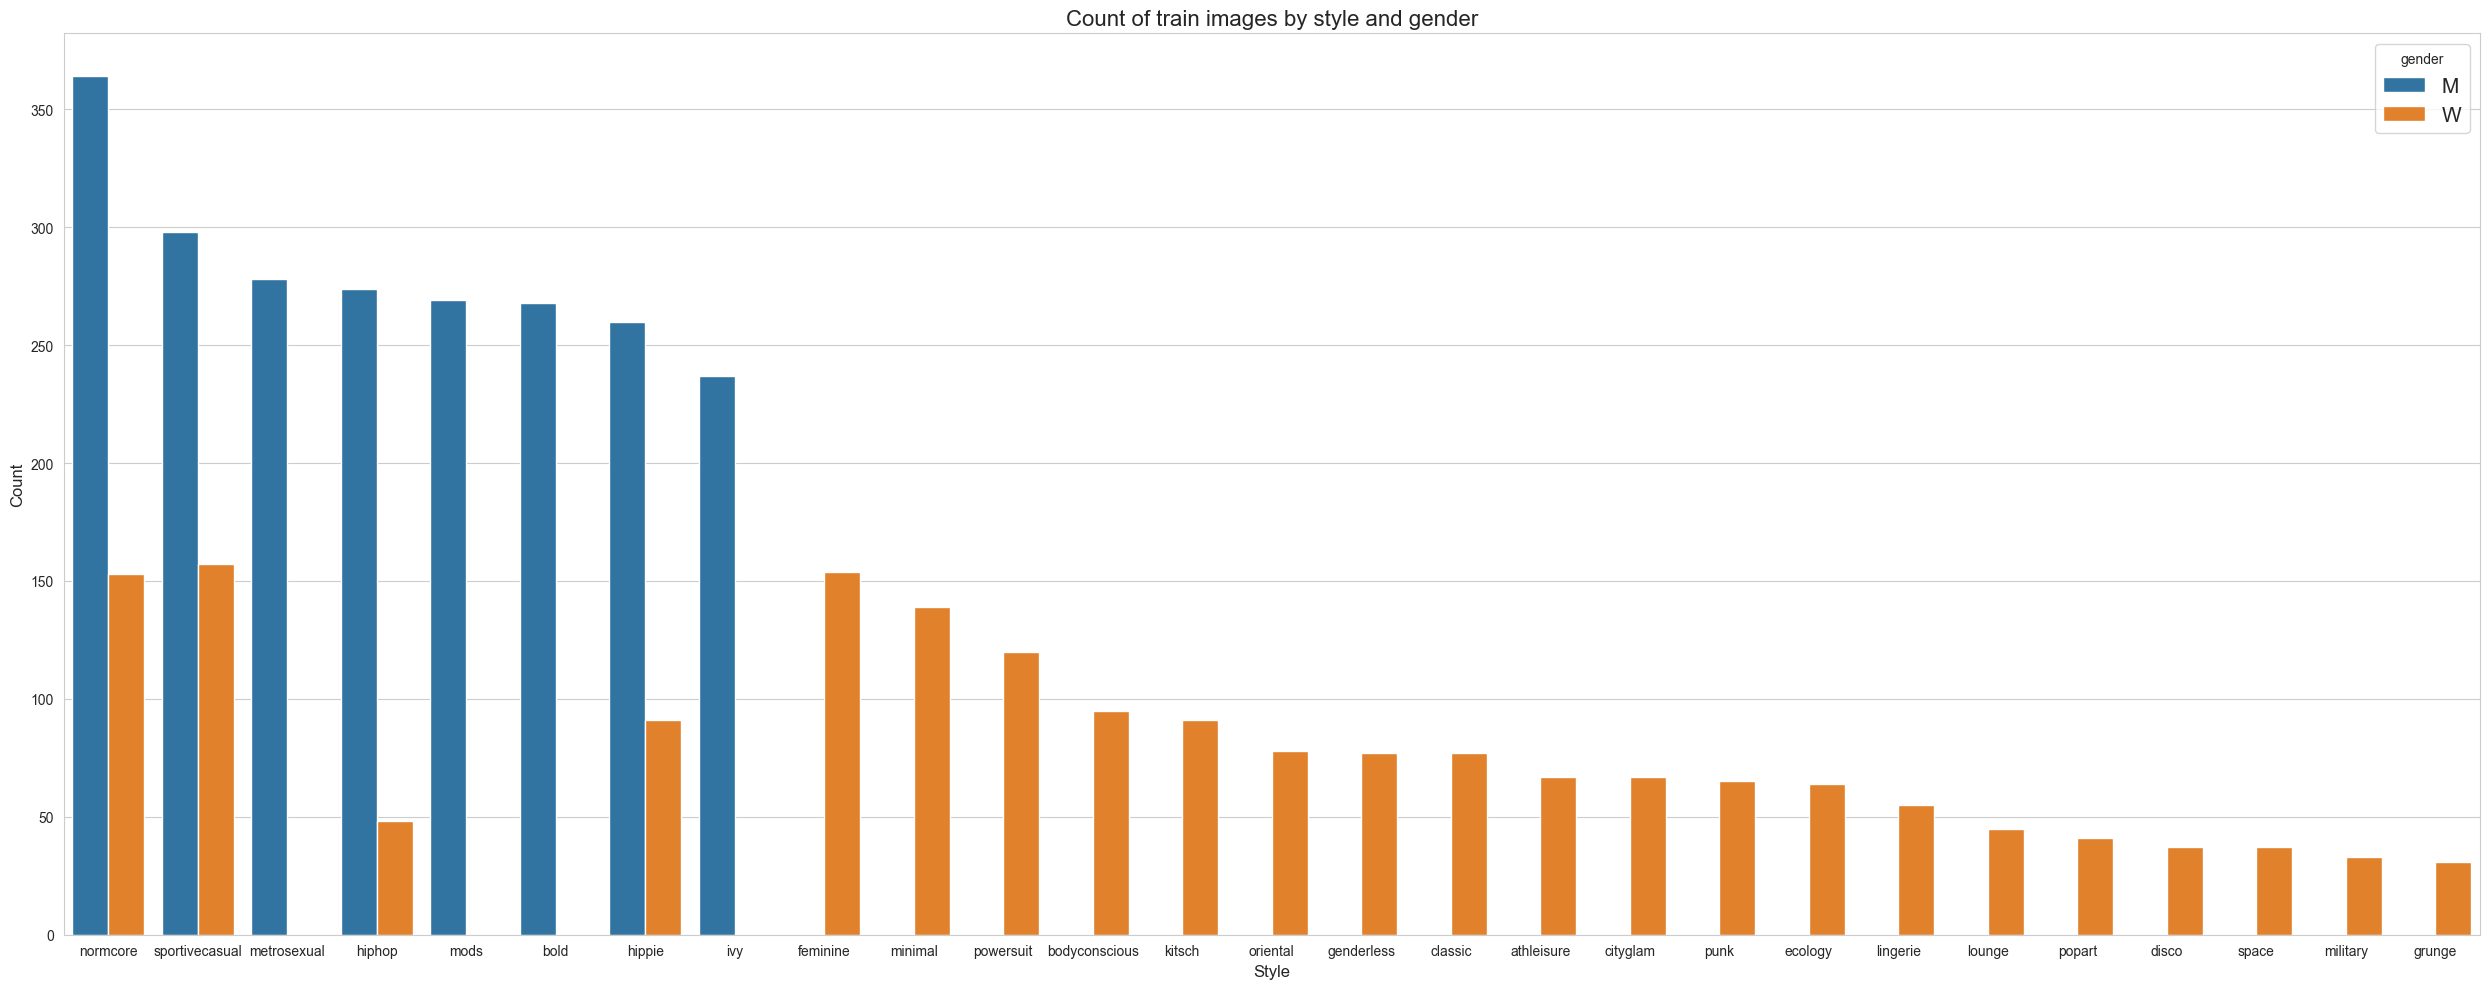

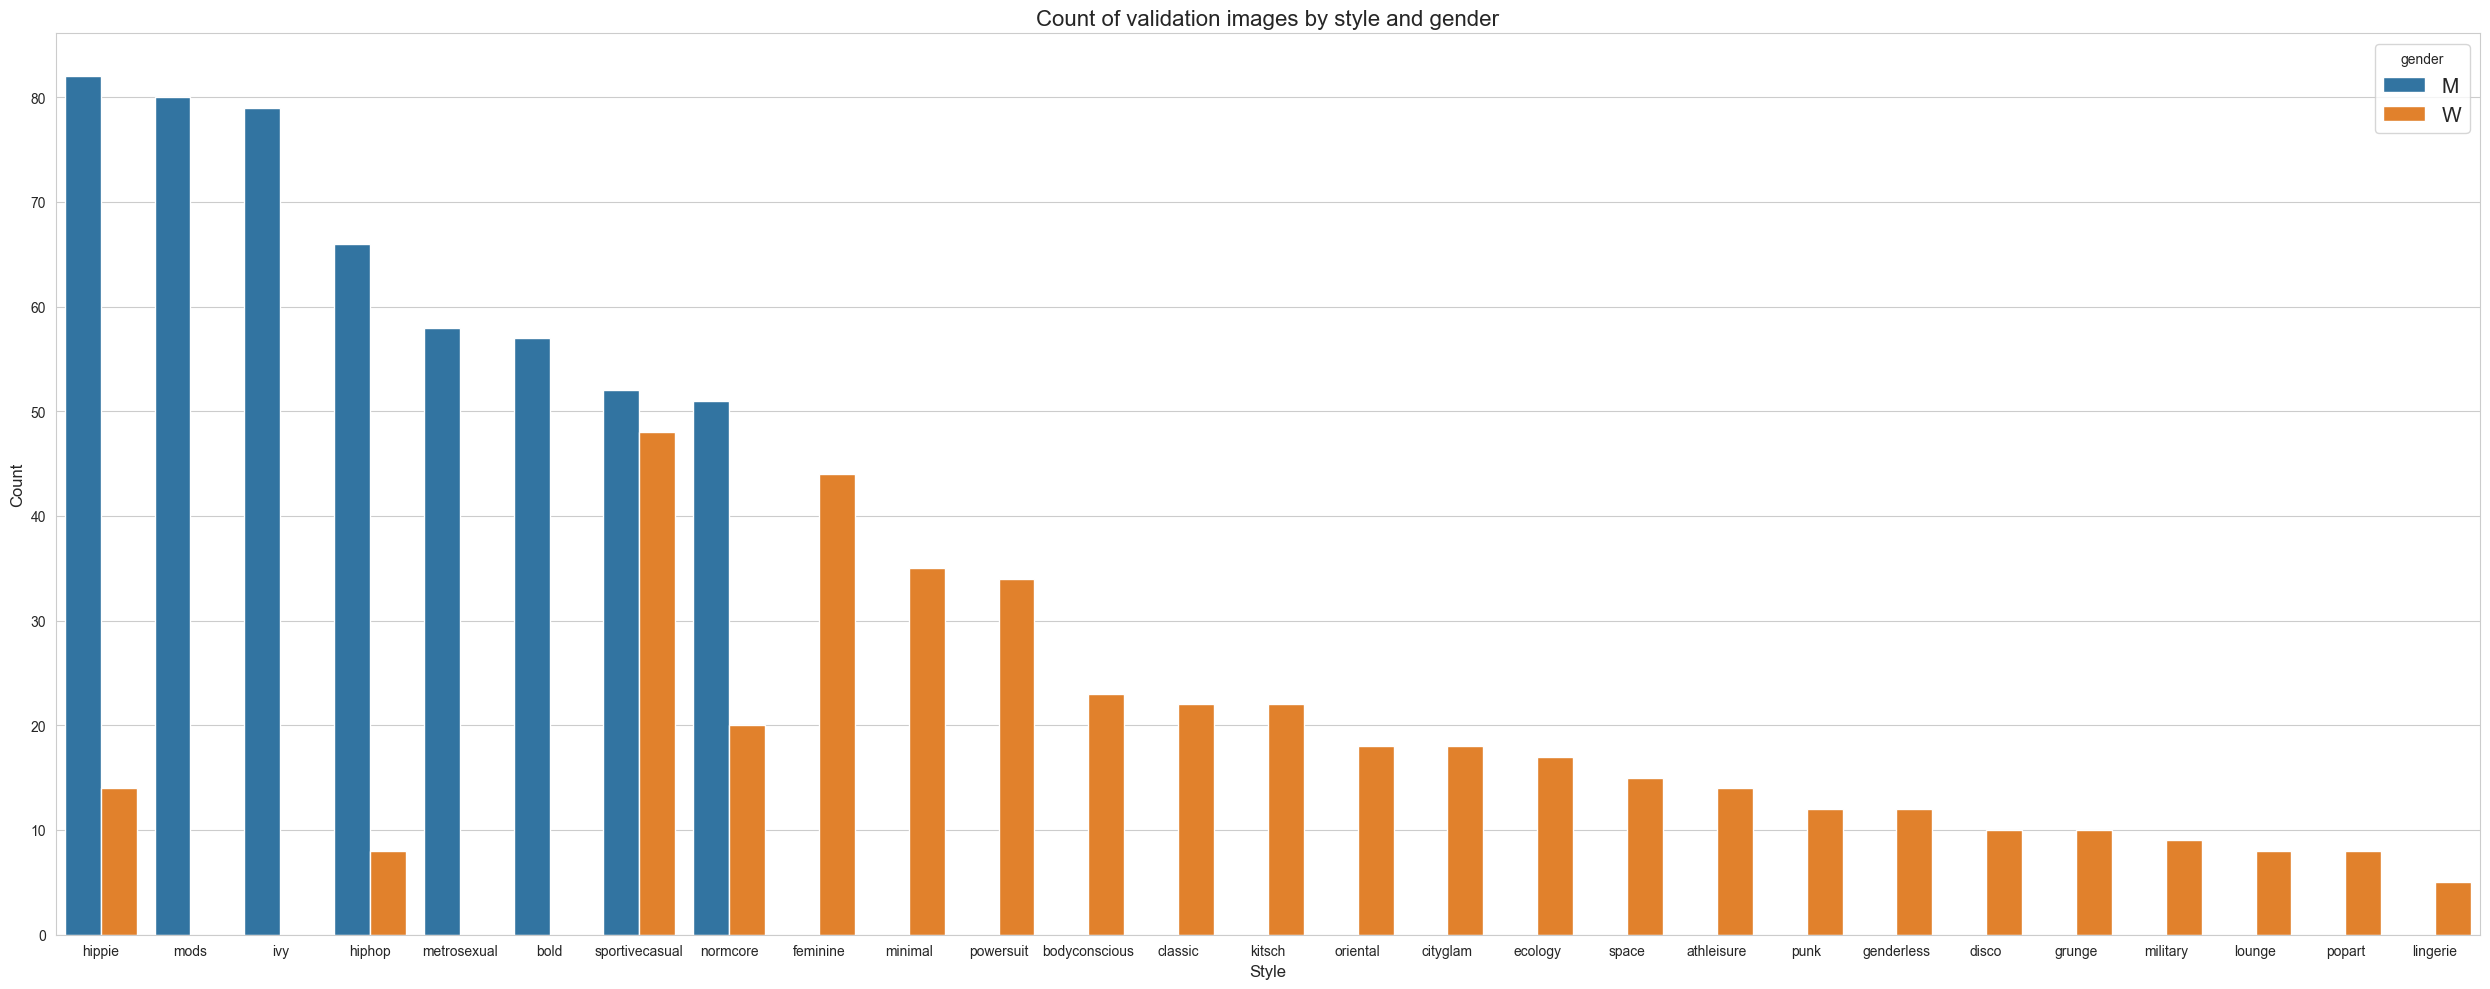

In [27]:
train_df = plot_metadata(train_metadata, title_name='train')
val_df = plot_metadata(val_metadata, title_name='validation')

In [28]:
train_df

,gender,style,count
0,M,normcore,364
1,M,sportivecasual,298
2,M,metrosexual,278
3,M,hiphop,274
4,M,mods,269
5,M,bold,268
6,M,hippie,260
7,M,ivy,237
8,W,sportivecasual,157
9,W,feminine,154


In [30]:
# 정보를 csv 파일로 저장
train_df.to_csv('./dataset/train_mission1-1.csv', index=False)
val_df.to_csv('./dataset/val_mission1-1.csv', index=False)